## Nashville Software School
## Data Analytics Jumpstart

Scenario: Metro Council has engaged your analytics consulting company to help the
council understand if citizens are less satisfied in areas where adverse events are more
likely to occur.

Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
%matplotlib inline

Read in the 2018 police calls data (police_calls_2018.csv to a dataframe called
police_calls.
a. Look at the first 5 rows.
b. Look at the last 3 rows.
c. How many rows and columns does police_calls contain?

In [2]:
police_calls = pd.read_csv('../data/police_calls_2018.csv')

In [3]:
police_calls.head()

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Latitude,Longitude,geometry,zipcode,PO
0,PD201800174484,02/16/2018 07:09:00 PM,20180155542,B,93,Traffic Violation,3,CITATION - TRAFFIC,600.0,ALBANY DR,521B,H,23,36.210,-86.600,POINT (-86.59999999999999 36.21),37076,HERMITAGE
1,PD201800174650,02/16/2018 08:02:00 PM,20180155684,B,93,Traffic Violation,9,SUBJECT WARNED,5800.0,OLD HICKORY BLVD,5F34,H,21,36.169,-86.601,POINT (-86.601 36.169),37076,HERMITAGE
2,PD201800175038,02/16/2018 10:16:00 PM,20180156001,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,3700.0,JAMES KAY LN,521B,H,21,36.178,-86.616,POINT (-86.616 36.178),37076,HERMITAGE
3,PD201800174217,02/16/2018 05:58:00 PM,20180155321,B,87,Safety Hazard,3,CITATION - TRAFFIC,0.0,MM 221 4 I40 E,5122,H,23,36.170,-86.591,POINT (-86.59100000000001 36.17),37076,HERMITAGE
4,PD201800173907,02/16/2018 04:19:00 PM,20180155047,B,93,Traffic Violation,9,SUBJECT WARNED,1300.0,TULIP GROVE RD,521B,H,23,36.175,-86.596,POINT (-86.596 36.175),37076,HERMITAGE


In [4]:
police_calls.tail(3)

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Latitude,Longitude,geometry,zipcode,PO
718018,PD201800855208,08/29/2018 09:11:36 AM,20180740194,A,45,Vehicle Accident - Property Damage,1,M.P.D. REPORT COMPLED,6900.0,NOLENSVILLE PKE,3T73,S,31,35.994,-86.685,POINT (-86.685 35.994),37027,BRENTWOOD
718019,PD201800783912,08/08/2018 10:15:20 AM,0,A,43,Want Officer for Investigation / Assistance,11,DISREGARD / SIGNAL 9,0.0,HIGHWAY 70&CHEATHAM CO LINE,NaN,W,25,36.094,-87.038,POINT (-87.038 36.094),37143,PEGRAM
718020,PD201800800491,08/13/2018 11:51:29 AM,20180693242,A,96,Business Check,4,ASSISTED CITIZEN,0.0,HIGHWAY 70&CHEATHAM CO LINE,5252,W,23,36.094,-87.038,POINT (-87.038 36.094),37143,PEGRAM


In [5]:
police_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718021 entries, 0 to 718020
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Event Number             718021 non-null  object 
 1   Call Received            718021 non-null  object 
 2   Complaint Number         718021 non-null  int64  
 3   Shift                    688006 non-null  object 
 4   Tencode                  718021 non-null  int64  
 5   Tencode Description      718021 non-null  object 
 6   Disposition Code         718021 non-null  int64  
 7   Disposition Description  717888 non-null  object 
 8   Block                    718021 non-null  float64
 9   Street Name              718021 non-null  object 
 10  Unit Dispatched          678310 non-null  object 
 11  Sector                   716842 non-null  object 
 12  Zone                     718021 non-null  object 
 13  Latitude                 718021 non-null  float64
 14  Long

Keep just these columns:
a. 'Call Received'
b. 'Shift'
c. 'Tencode'
d. 'Tencode Description'
e. 'Disposition Code'
f. 'Disposition Description'
g. 'Unit Dispatched'
h. 'Sector'
i. 'Zone'
j. 'Latitude'
k. 'Longitude'
l. 'zipcode'
m. 'PO'

In [6]:
police_calls.drop(columns = ["Event Number", "Complaint Number", "Block", "Street Name", "geometry"])

,Call Received,Shift,Tencode,Tencode Description,Disposition Code,Disposition Description,Unit Dispatched,Sector,Zone,Latitude,Longitude,zipcode,PO
0,02/16/2018 07:09:00 PM,B,93,Traffic Violation,3,CITATION - TRAFFIC,521B,H,23,36.210,-86.600,37076,HERMITAGE
1,02/16/2018 08:02:00 PM,B,93,Traffic Violation,9,SUBJECT WARNED,5F34,H,21,36.169,-86.601,37076,HERMITAGE
2,02/16/2018 10:16:00 PM,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,521B,H,21,36.178,-86.616,37076,HERMITAGE
3,02/16/2018 05:58:00 PM,B,87,Safety Hazard,3,CITATION - TRAFFIC,5122,H,23,36.170,-86.591,37076,HERMITAGE
4,02/16/2018 04:19:00 PM,B,93,Traffic Violation,9,SUBJECT WARNED,521B,H,23,36.175,-86.596,37076,HERMITAGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
718016,07/16/2018 02:51:29 PM,A,93,Traffic Violation,9,SUBJECT WARNED,8F62,S,31,35.993,-86.685,37027,BRENTWOOD
718017,07/27/2018 01:24:55 AM,C,70,Burglary - Residence,13,FALSE CALL,317C,S,31,35.994,-86.685,37027,BRENTWOOD
718018,08/29/2018 09:11:36 AM,A,45,Vehicle Accident - Property Damage,1,M.P.D. REPORT COMPLED,3T73,S,31,35.994,-86.685,37027,BRENTWOOD
718019,08/08/2018 10:15:20 AM,A,43,Want Officer for Investigation / Assistance,11,DISREGARD / SIGNAL 9,NaN,W,25,36.094,-87.038,37143,PEGRAM


Rename Columns:

In [7]:
police_calls = police_calls.rename(columns = {
    "Call Received": "call_time",
    "Shift": "shift",
    "Tencode": "tencode",
    "Tencode Description": "tencode_desc",
    "Disposition Code": "disposition",
    "Disposition Description": "disposition_desc",
    "Unit Dispatched": "unit_dispatched",
    "Sector": "sector",
    "Zone": "zone",
    "Latitude": "lat",
    "Longitude": "lng",
    "zipcode": "zipcode",
    "PO": "po"
})

In [8]:
police_calls["disposition_desc"].unique()

array(['CITATION - TRAFFIC', 'SUBJECT WARNED', 'ASSISTED OTHER UNIT',
       'GONE ON ARRIVAL', 'ASSISTED CITIZEN', 'COMMUNITY POLICING',
       'LOCATION/BUILDING SECURE', 'DISREGARD / SIGNAL 9',
       'M.P.D. REPORT COMPLED', 'ADVISED IN CIVIL CASE', 'FALSE CALL',
       'NO RESPONSE', 'ARREST, CUSTODIAL OR CITATION',
       'ASSISTANCE REFUSED', 'ADVISORY / NOTICE FORM GIVEN', nan],
      dtype=object)

Remove all rows from police_calls where the disposition description is missing (nan) or
one of these two: DISREGARD / SIGNAL 9, NO RESPONSE. Check to see that you
have 624841 rows remaining.

In [9]:
police_calls = police_calls.dropna(subset=['disposition_desc'])
# another way:
#police_calls = police_calls[police_calls.disposition_desc.notnull()]
not_in_list = ['DISREGARD / SIGNAL 9', 'NO RESPONSE']
police_calls = police_calls[~police_calls['disposition_desc'].isin(not_in_list)]
police_calls


,Event Number,call_time,Complaint Number,shift,tencode,tencode_desc,disposition,disposition_desc,Block,Street Name,unit_dispatched,sector,zone,lat,lng,geometry,zipcode,po
0,PD201800174484,02/16/2018 07:09:00 PM,20180155542,B,93,Traffic Violation,3,CITATION - TRAFFIC,600.0,ALBANY DR,521B,H,23,36.210,-86.600,POINT (-86.59999999999999 36.21),37076,HERMITAGE
1,PD201800174650,02/16/2018 08:02:00 PM,20180155684,B,93,Traffic Violation,9,SUBJECT WARNED,5800.0,OLD HICKORY BLVD,5F34,H,21,36.169,-86.601,POINT (-86.601 36.169),37076,HERMITAGE
2,PD201800175038,02/16/2018 10:16:00 PM,20180156001,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,3700.0,JAMES KAY LN,521B,H,21,36.178,-86.616,POINT (-86.616 36.178),37076,HERMITAGE
3,PD201800174217,02/16/2018 05:58:00 PM,20180155321,B,87,Safety Hazard,3,CITATION - TRAFFIC,0.0,MM 221 4 I40 E,5122,H,23,36.170,-86.591,POINT (-86.59100000000001 36.17),37076,HERMITAGE
4,PD201800173907,02/16/2018 04:19:00 PM,20180155047,B,93,Traffic Violation,9,SUBJECT WARNED,1300.0,TULIP GROVE RD,521B,H,23,36.175,-86.596,POINT (-86.596 36.175),37076,HERMITAGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718015,PD201800702497,07/15/2018 12:19:33 PM,20180609674,A,88,Investigate 911 Hang-Up Call,5,GONE ON ARRIVAL,6900.0,NOLENSVILLE PKE,330A,S,31,35.995,-86.686,POINT (-86.68600000000001 35.995),37027,BRENTWOOD
718016,PD201800705866,07/16/2018 02:51:29 PM,20180612515,A,93,Traffic Violation,9,SUBJECT WARNED,0.0,NOLENSVILLE PKE & OLD BURKITT,8F62,S,31,35.993,-86.685,POINT (-86.685 35.993),37027,BRENTWOOD
718017,PD201800743231,07/27/2018 01:24:55 AM,20180644624,C,70,Burglary - Residence,13,FALSE CALL,6900.0,NOLENSVILLE PKE,317C,S,31,35.994,-86.685,POINT (-86.685 35.994),37027,BRENTWOOD
718018,PD201800855208,08/29/2018 09:11:36 AM,20180740194,A,45,Vehicle Accident - Property Damage,1,M.P.D. REPORT COMPLED,6900.0,NOLENSVILLE PKE,3T73,S,31,35.994,-86.685,POINT (-86.685 35.994),37027,BRENTWOOD


Create a dataframe from the tencode_desc value counts called tencode_counts. It
should have two columns called tencode and tencode_count.

In [1]:
tencode_counts = police_calls['tencode_desc'].value_counts()
tencode_counts = tencode_counts.reset_index()
tencode_counts.columns = ['tencode','tencode_count']
tencode_counts.head()


NameError: name 'police_calls' is not defined

Create a seaborn horizontal barplot to show the 2018 calls for police service by tencode.
Adjust the figsize so that you can see all of the data.

In [11]:
import seaborn as sns

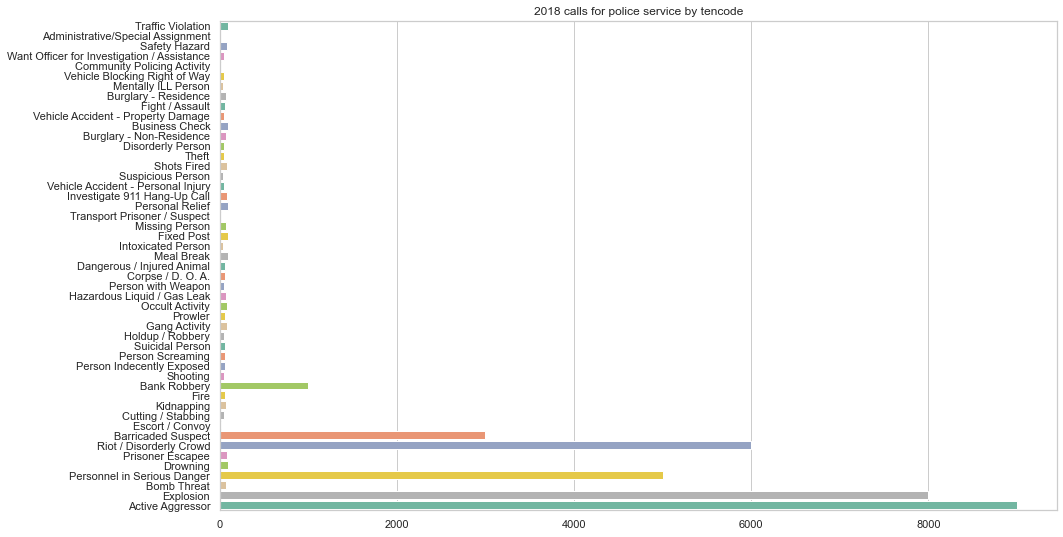

In [12]:
plt.figure(figsize = (15, 9))                               # Increase the plot size to 15 x 9
sns.set(style="whitegrid")                                  # Change the plot style
sns.barplot(x = 'tencode', 
            y = 'tencode_desc', 
            data = tencode_counts, 
            palette = 'Set2')
plt.xlabel('')                                              # Remove the x-axis label
plt.ylabel('')                                              # Remove the y-axis label
plt.title('2018 calls for police service by tencode');

Find the counts of calls by zipcode and plot that. Zip codes look like numeric data, but
should usually be treated as categorical. Convert the zipcode column to a string before
plotting to avoid having big gaps where there are numbers but no zip codes. Give the
plot a meaningful title.

In [13]:
police_calls['zipcode'] = police_calls['zipcode'].astype(str)

Text(0.5, 1.0, '2018 calls for police service by zipcode')

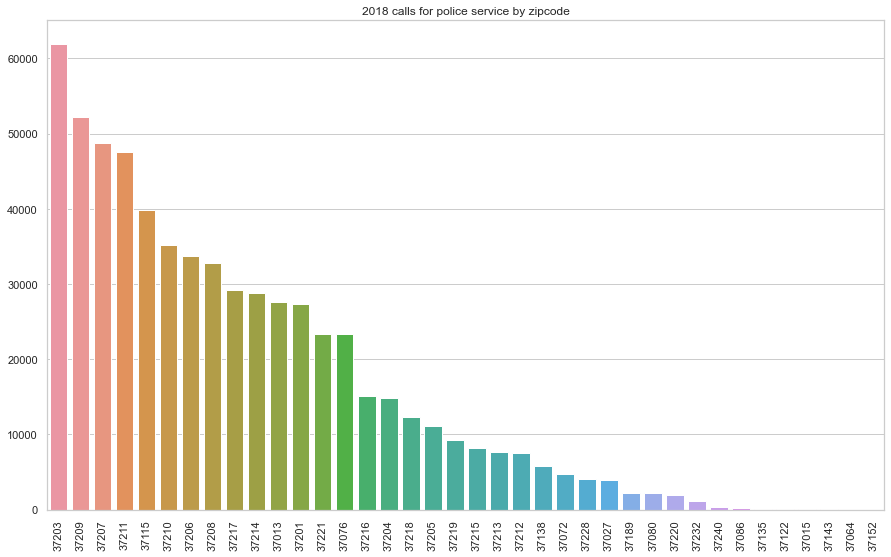

In [14]:
zipcode_counts = police_calls['zipcode'].value_counts()
plt.figure(figsize = (15, 9))
zipplot = sns.barplot(
           x = zipcode_counts.index, 
           y = zipcode_counts.values);
zipplot.set_xticklabels(zipplot.get_xticklabels(), rotation = 90)
zipplot
plt.title('2018 calls for police service by zipcode')

#alternative to get two columns for value counts -- remember to reset index
#call_zip_counts = police_calls.zipcode.value_counts().reset_index()
#call_zip_counts.columns = ["zipcode", "number_of_calls"]


 The Metro Council is interested in the effect of community policing activities. For which zip codes do calls for “Community Policing Activity” most frequently occur? How do these zip codes compare to what you see when looking at the overall counts by zip code?

Text(0.5, 1.0, '2018 community policing activity calls by zicode')

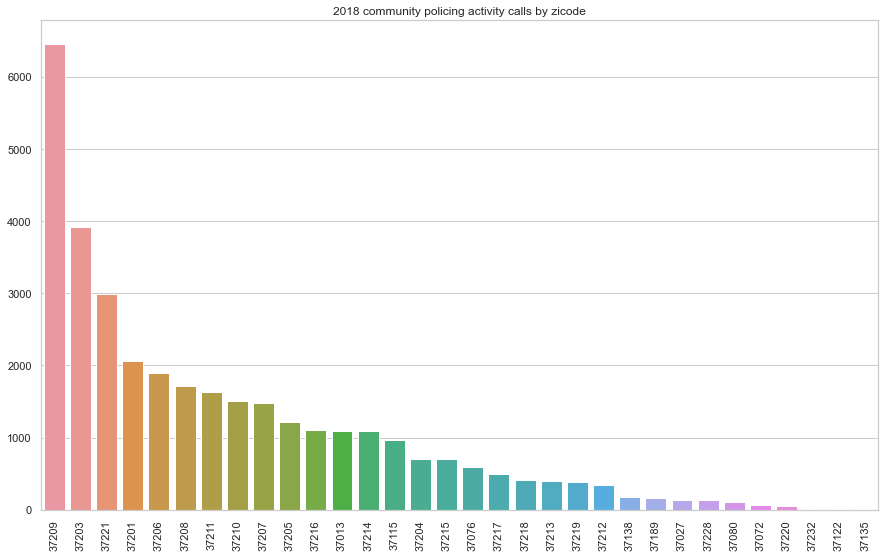

In [29]:
cpa = police_calls[police_calls['tencode_desc'] == 'Community Policing Activity']

cpavalues = cpa['zipcode'].value_counts()
plt.figure(figsize = (15, 9))
cpaplot = sns.barplot(
           x = cpavalues.index, 
           y = cpavalues.values);
cpaplot.set_xticklabels(cpaplot.get_xticklabels(), rotation = 90)
cpaplot
plt.title('2018 community policing activity calls by zicode')


 Convert the call_time column in police_calls to a pandas datetime. You’ll likely want to specify the format argument in order to speed up execution. Create a new column in police_calls to show the month that a call for service occurred. In which month(s) did most calls occur? What do you notice about the months for which data is provided?

In [46]:
#converting call time to date/time:
police_calls['call_time'] = pd.to_datetime(police_calls['call_time'], 
                                            format = '%m/%d/%Y %I:%M:%S %p')
#new column:
police_calls['month'] = police_calls['call_time'].dt.month

#of calls by month:
police_calls['month'].value_counts()# add: .sort_index().plot(kind = 'bar');

1    85094
3    79892
5    74718
8    73181
6    73098
2    72413
4    65953
7    57558
9    42934
Name: month, dtype: int64

Which days of the week tend to get the most calls? Which tend to get the least?

In [51]:
police_calls['day'] = police_calls['call_time'].dt.dayofweek
police_calls['day'].value_counts()
# alternative to avoid day indexing: police_calls['call_time'].dt.day_name().value_counts()

1    102706
2    101700
3     97885
4     95998
0     92536
5     71102
6     62914
Name: day, dtype: int64

Alternative method:

In [53]:
police_calls['weekday'] = pd.DatetimeIndex(police_calls['call_time']).dayofweek
police_calls

,Event Number,call_time,Complaint Number,shift,tencode,tencode_desc,disposition,disposition_desc,Block,Street Name,...,sector,zone,lat,lng,geometry,zipcode,po,month,day,weekday
0,PD201800174484,2018-02-16 19:09:00,20180155542,B,93,Traffic Violation,3,CITATION - TRAFFIC,600.0,ALBANY DR,...,H,23,36.210,-86.600,POINT (-86.59999999999999 36.21),37076,HERMITAGE,2,4,4
1,PD201800174650,2018-02-16 20:02:00,20180155684,B,93,Traffic Violation,9,SUBJECT WARNED,5800.0,OLD HICKORY BLVD,...,H,21,36.169,-86.601,POINT (-86.601 36.169),37076,HERMITAGE,2,4,4
2,PD201800175038,2018-02-16 22:16:00,20180156001,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,3700.0,JAMES KAY LN,...,H,21,36.178,-86.616,POINT (-86.616 36.178),37076,HERMITAGE,2,4,4
3,PD201800174217,2018-02-16 17:58:00,20180155321,B,87,Safety Hazard,3,CITATION - TRAFFIC,0.0,MM 221 4 I40 E,...,H,23,36.170,-86.591,POINT (-86.59100000000001 36.17),37076,HERMITAGE,2,4,4
4,PD201800173907,2018-02-16 16:19:00,20180155047,B,93,Traffic Violation,9,SUBJECT WARNED,1300.0,TULIP GROVE RD,...,H,23,36.175,-86.596,POINT (-86.596 36.175),37076,HERMITAGE,2,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718015,PD201800702497,2018-07-15 12:19:33,20180609674,A,88,Investigate 911 Hang-Up Call,5,GONE ON ARRIVAL,6900.0,NOLENSVILLE PKE,...,S,31,35.995,-86.686,POINT (-86.68600000000001 35.995),37027,BRENTWOOD,7,6,6
718016,PD201800705866,2018-07-16 14:51:29,20180612515,A,93,Traffic Violation,9,SUBJECT WARNED,0.0,NOLENSVILLE PKE & OLD BURKITT,...,S,31,35.993,-86.685,POINT (-86.685 35.993),37027,BRENTWOOD,7,0,0
718017,PD201800743231,2018-07-27 01:24:55,20180644624,C,70,Burglary - Residence,13,FALSE CALL,6900.0,NOLENSVILLE PKE,...,S,31,35.994,-86.685,POINT (-86.685 35.994),37027,BRENTWOOD,7,4,4
718018,PD201800855208,2018-08-29 09:11:36,20180740194,A,45,Vehicle Accident - Property Damage,1,M.P.D. REPORT COMPLED,6900.0,NOLENSVILLE PKE,...,S,31,35.994,-86.685,POINT (-86.685 35.994),37027,BRENTWOOD,8,2,2


## Begin Week 2 Analysis Questions from Hub Nashville